In [24]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from EDA import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# Fixing the seed
seed = 8

## Exploration of the data

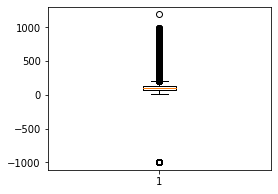

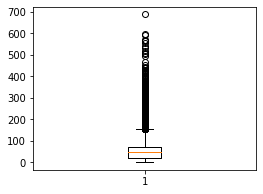

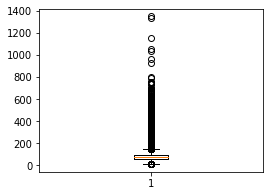

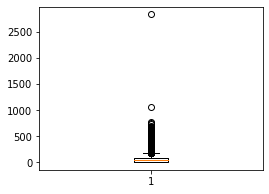

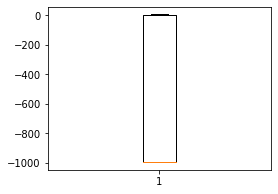

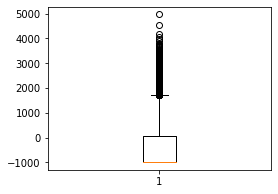

In [7]:
'''boxplot of some features to get an idea of the distribution'''
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,0])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,1])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,2])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,3])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,4])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,5])
plt.show()

In [12]:
ind_y_neg = np.array(np.where(y == -1)[0])
ind_y_pos = np.array(np.where(y == 1)[0])

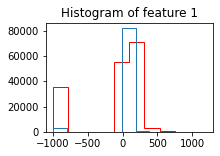

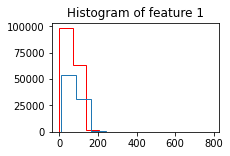

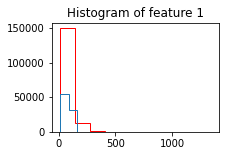

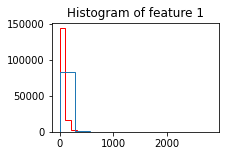

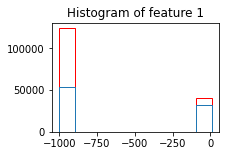

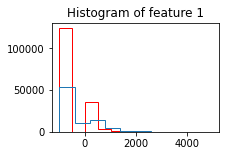

In [22]:
# histogram of some features
plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,0], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,0], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,1], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,2], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,2], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,2], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,3], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,3], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,4], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,4], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(tX[ind_y_neg,5], histtype = 'step', color = 'red')
plt.hist(tX[ind_y_pos,5], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

With these histograms, we see that some features have constinuous distribution while others have discrete distribution

In [47]:
# Counting the number of outliers for each feature
out = []
for i in range (tX.shape[1]):
    ind = indices_outliers(tX[:,i])
    out.append(len(ind))
print(out)

[49357, 1850, 14611, 13891, 0, 1176, 0, 644, 8632, 12289, 9566, 0, 0, 13925, 0, 0, 13434, 0, 0, 13299, 0, 10307, 0, 0, 0, 0, 0, 0, 0, 11153]


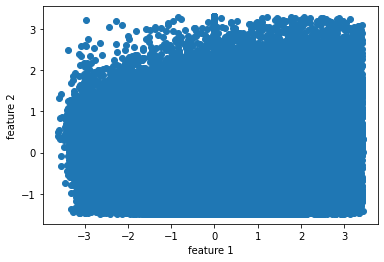

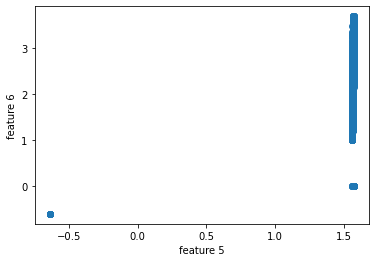

In [13]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(tX[:,0], tX[:,1])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(tX[:,4], tX[:,5])
ax.set_xlabel('feature 5')
ax.set_ylabel('feature 6')
plt.show()

### Split and classify data

In [25]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(y, tX)

In [29]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(tX)

In [30]:
# Split into a train and a test set
train_0, y_tr_0, test_0, y_te_0 = train_test_separator(y_0, class_0, 0.8, seed)
train_1, y_tr_1, test_1, y_te_1 = train_test_separator(y_1, class_1, 0.8, seed)
train_2, y_tr_2, test_2, y_te_2 = train_test_separator(y_2, class_2, 0.8, seed)
train_3, y_tr_3, test_3, y_te_3 = train_test_separator(y_3, class_3, 0.8, seed)

## Train part

#### Fitting class 0

##### Least Squares

In [31]:
mse, w_least_squares = least_squares(y_tr_0, train_0)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares, test_0)
counting_errors(test_pred, y_te_0)

train mse: 0.3918645415903907
Numbers of errors :  22153  // Error accuracy [%] : % 27.7155010634305
Numbers of errors :  5593  // Error accuracy [%] : % 27.988790471901115


0

##### Least Squares Gradient Descent

In [32]:
initial_w = np.ones(train_0.shape[1])
mse, w_least_squares_GD = least_squares_GD(y_tr_0, train_0, initial_w, max_iters = 100, gamma = 0.000001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_GD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares_GD, test_0)
counting_errors(test_pred, y_te_0)

train mse: 12.221273733936886
Numbers of errors :  40829  // Error accuracy [%] : % 51.080945827599145
Numbers of errors :  10232  // Error accuracy [%] : % 51.20352299454536


0

#### Stochastic gradient

In [92]:
initial_w = np.ones(train_0.shape[1])
mse, w_least_squares_SGD = stochastic_gradient_descent(y_tr_0, train_0, initial_w, max_iters = 50, gamma = 0.001, batch_size=100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares_SGD, test_0)
counting_errors(test_pred, y_te_0)

train mse: 9.779980472888239
Numbers of errors :  40628  // Error accuracy [%] : % 50.8294757913174
Numbers of errors :  10229  // Error accuracy [%] : % 51.18851023369865


0

#### Ridge regression


In [93]:
mse, w_least_squares_SGD = ridge_regression(y_tr_0, train_0, 0.001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares_SGD, test_0)
counting_errors(test_pred, y_te_0)

train mse: 0.4087441688339519
Numbers of errors :  24277  // Error accuracy [%] : % 30.372826222945076
Numbers of errors :  6065  // Error accuracy [%] : % 30.350798178451683


0

#### Logistic regression with gradient descent

In [44]:
#replace the -1 output by 0 because our logistic regression is for y = {0, 1}
ind_y_tr_0_neg = np.array(np.where(y_tr_0 == -1)[0])
ind_y_te_0_neg = np.array(np.where(y_te_0 == -1)[0])
for i in (ind_y_tr_0_neg):
    y_tr_0[i] = 0
for i in (ind_y_te_0_neg):
    y_te_0[i] = 0

In [51]:
initial_w = np.zeros(train_0.shape[1])
mse, w_log_reg_GD = logistic_regression_GD(y_tr_0, train_0, initial_w)
print("train mse: " + str(mse))

train_pred = predict_labels(w_log_reg_GD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_log_reg_GD, test_0)
counting_errors(test_pred, y_te_0)

/home/ML_course/projects/project1/scripts/implementations.py:132: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
/home/ML_course/projects/project1/scripts/implementations.py:140: RuntimeWarning: divide by zero encountered in log
  return - (y.T.dot(np.log(sigma)) + (1 - y).T.dot(np.log(1 - sigma)))


train mse: nan
Numbers of errors :  62430  // Error accuracy [%] : % 78.10584261228574
Numbers of errors :  15675  // Error accuracy [%] : % 78.44167542411049


0

#### Cross-Validation

In [78]:
seed = 1
k_fold = 4
method = ridge_regression
lambdas = np.logspace(-4, 0, 30)
initial_w = np.zeros(class_0.shape[1])
# split data in k fold
k_indices = build_k_indices(y_0, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
    
for lambda_ in lambdas:
    rmse_tr_i = []
    rmse_te_i = []
        
    for k in range(k_fold):
        # cross validation:
        loss_tr_i, loss_te_i = cross_validation(y_0, class_0, k_indices, k, method, initial_w, lambdas, gamma = 0.01, max_iters = 50) 
        rmse_tr_i.append(np.sqrt(2 * loss_tr_i))
        rmse_te_i.append(np.sqrt(2 * loss_te_i))
        
    rmse_tr.append(np.mean(rmse_tr_i))
    rmse_te.append(np.mean(rmse_te_i))

ValueError: operands could not be broadcast together with shapes (30,) (16,16) 

##### Cross validation fonctionne pour une seule step avec ridge mais dès que je la mets comme method dans le code du dessus ça ne fonctionne pas. Je ne comprends pas pourquoi. 
##### Aussi je ne suis pas sûre de quel set utiliser: train_0 ou class_0? 

In [79]:
### seed = 1
k_fold = 4
method = ridge_regression
k = 2
initial_w = np.zeros(class_0.shape[1])
# split data in k fold
k_indices = build_k_indices(y_0, k_fold, seed)
loss_tr, loss_te = cross_validation(y_0, class_0, k_indices, k, method, initial_w) 

#### Fitting class ...

#### Least Squares

In [46]:
mse, w_least_squares = least_squares(train_truth, train_set)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares, test_set)
counting_errors(test_pred, test_truth)

train mse: 0.32962614453827543
Numbers of errors :  42200  // Error accuracy [%] : % 24.114285714285714
Numbers of errors :  17982  // Error accuracy [%] : % 23.976


0

#### Least Squares Gradient Descent

In [47]:
initial_w = np.ones(train_set.shape[1])
mse, w_least_squares_GD = least_squares_GD(train_truth, train_set, initial_w, max_iters = 100, gamma = 0.000001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_GD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_GD, test_set)
counting_errors(test_pred, test_truth)

train mse: 7.247372353701187e+140
Numbers of errors :  65973  // Error accuracy [%] : % 37.69885714285714
Numbers of errors :  28248  // Error accuracy [%] : % 37.663999999999994


0

#### Stochastic gradient

In [48]:
initial_w = np.ones(train_set.shape[1])
mse, w_least_squares_SGD = stochastic_gradient_descent(train_truth, train_set, initial_w, max_iters = 50, gamma = 0.001, batch_size=100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_SGD, test_set)
counting_errors(test_pred, test_truth)

Gradient Descent(0/49): loss=22352752.564850062, w0=507.6768749084287, w1=253.4950977860085
Gradient Descent(1/49): loss=649520646347999.9, w0=-3288371.371992392, w1=-1455852.933873
Gradient Descent(2/49): loss=2.0365029742175234e+22, w0=19017034558.2482, w1=8167104831.863024
Gradient Descent(3/49): loss=6.860383902032167e+29, w0=-110061603820570.89, w1=-55989521338138.0
Gradient Descent(4/49): loss=2.174960797118769e+37, w0=5.7166267772878035e+17, w1=2.937687778531764e+17
Gradient Descent(5/49): loss=7.056687773919344e+44, w0=-3.577060137773375e+21, w1=-1.6004809603183068e+21
Gradient Descent(6/49): loss=2.6188895001392775e+52, w0=2.1642311150758674e+25, w1=9.227797734424989e+24
Gradient Descent(7/49): loss=8.396817223706459e+59, w0=-1.0561617004412673e+29, w1=-4.955423429381676e+28
Gradient Descent(8/49): loss=2.5145709942044673e+67, w0=6.0460792870423076e+32, w1=3.2429150450605474e+32
Gradient Descent(9/49): loss=7.408967614062814e+74, w0=-3.60760104224532e+36, w1=-1.494407406445966

0

#### Ridge regression


In [49]:
mse, w_least_squares_SGD = ridge_regression(train_truth, train_set, 0.001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_SGD, test_set)
counting_errors(test_pred, test_truth)

train mse: 0.32962841761570955
Numbers of errors :  42165  // Error accuracy [%] : % 24.094285714285714
Numbers of errors :  18005  // Error accuracy [%] : % 24.006666666666668


0

#### Logistic regression with gradient descent

In [67]:
initial_w = np.zeros(train_set.shape[1])
mse, w_log_reg_GD = logistic_regression_GD(train_truth, train_set, initial_w, 0.01, 100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_log_reg_GD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_log_reg_GD, test_set)
counting_errors(test_pred, test_truth)

train mse: nan
Numbers of errors :  60456  // Error accuracy [%] : % 34.546285714285716
Numbers of errors :  25802  // Error accuracy [%] : % 34.40266666666666


0

#### Cross-Validation

In [66]:
seed = 1
k = 2
k_indices = build_k_indices(train_truth, k_fold, seed)
initial_w = np.zeros(train_set.shape[1])
loss_tr, loss_te = cross_validation(train_truth, train_set, k_indices, k, least_squares_GD, initial_w)

In [67]:
print('training loss : ' + str(loss_tr))
print('testing loss : ' + str(loss_te))

training loss : [inf]
testing loss : [inf]


## Generate predictions and save ouput in csv format for submission:

In [34]:
DATA_TEST_PATH = "../data/test.csv"
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [35]:
_.shape, tX_test.shape, ids_test.shape

((568238,), (568238, 30), (568238,))

In [33]:
'''choose the w we want to use for the submission and the tX_test'''
weights = w_least_squares_GD

In [36]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: shapes (568238,30) and (22,) not aligned: 30 (dim 1) != 22 (dim 0)